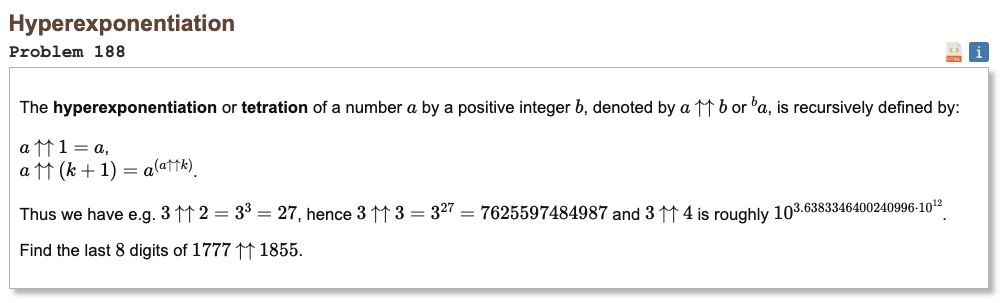

## Initial approach

* we want the last 8 digits of the giant tower 1777^^1855, so we only compute it modulo 10^8
* since 1777 and 10^8 are coprime, the exponent repeats with period λ(10^8), the Carmichael value
* this lets us shrink the exponent using λ(m) at each level of the tower
* we define a recursive step: a^^h mod m becomes a^(a^(h-1) mod λ(m)) mod m
* λ(m) gets small very fast, so the recursion never blows up
* when the modulus reaches 1 we return 0 and unwind
* the final last 8 digits of 1777^^1855 are 95962097

In [1]:
import math

def carmichael_2_5(n):
    e2 = 0
    e5 = 0
    x = n
    while x % 2 == 0 and x > 0:
        e2 += 1
        x //= 2
    while x % 5 == 0 and x > 0:
        e5 += 1
        x //= 5
    if x != 1:
        raise ValueError("Modulus has primes other than 2 and 5")
    if e2 == 0:
        lam2 = 1
    elif e2 == 1:
        lam2 = 1
    elif e2 == 2:
        lam2 = 2
    else:
        lam2 = 2 ** (e2 - 2)
    if e5 == 0:
        lam5 = 1
    else:
        lam5 = 4 * (5 ** (e5 - 1))
    return lam2 * lam5 // math.gcd(lam2, lam5)

def tetration_mod(a, h, m):
    if m == 1:
        return 0
    if h == 1:
        return a % m
    lam = carmichael_2_5(m)
    exp = tetration_mod(a, h - 1, lam)
    return pow(a, exp, m)

In [2]:
%%time

result = tetration_mod(1777, 1855, 10**8)
print("Result:", result)

Result: 95962097
CPU times: user 71 μs, sys: 6 μs, total: 77 μs
Wall time: 76.1 μs
